In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('house_rental_dataset.csv')

In [4]:
dataset.head()

,sr_no,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
dataset.drop(columns=['sr_no'],inplace=True)

In [6]:
dataset.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


<AxesSubplot:>

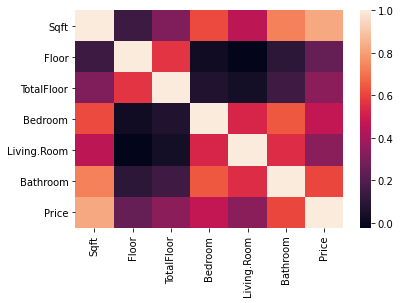

In [7]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [8]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [9]:
dataset.shape

(645, 7)

In [10]:
dataset.isnull().sum(axis=0)

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
print(linear_model.score(x_train, y_train))

0.7094932418800417


In [24]:
y_pred = linear_model.predict(x_test)

print(linear_model.score(x_test, y_test))

0.6466524390569491


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.6466524390569491
